In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('Titanic_encoded.csv')


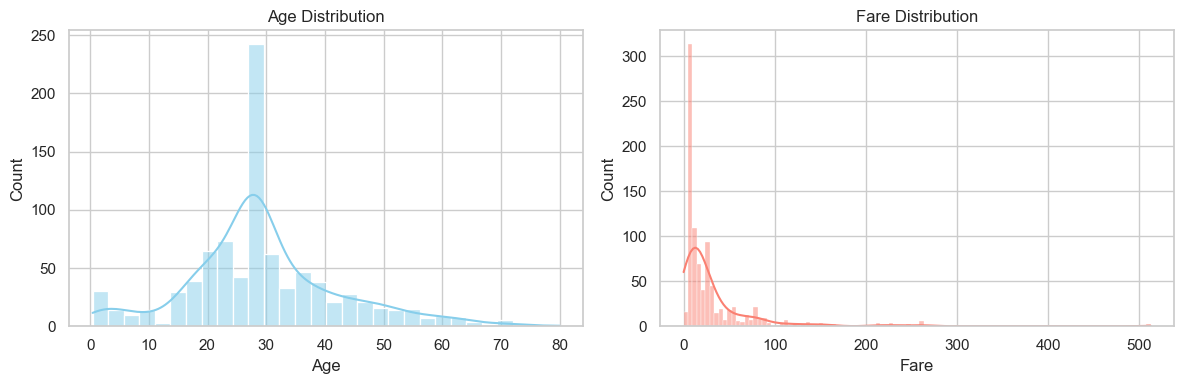

In [2]:
# Set plot style
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

# Fare Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True, color='salmon')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


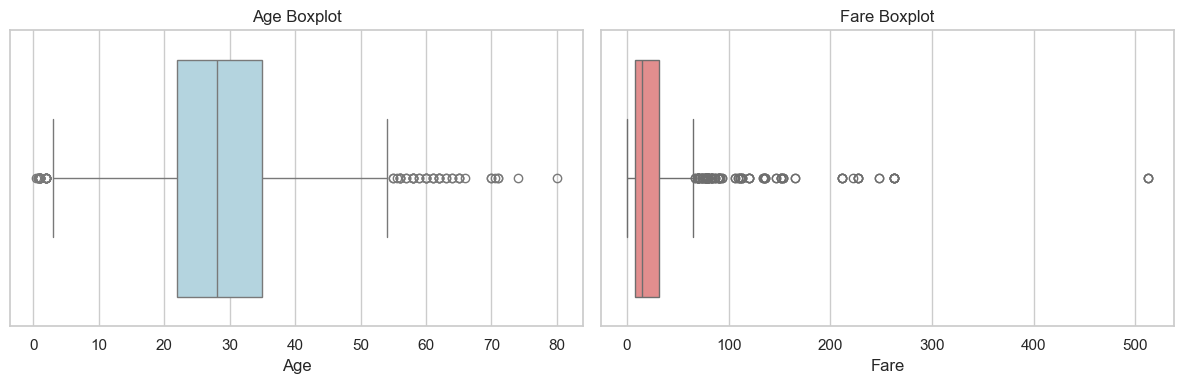

In [3]:
# Boxplots to spot outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'], color='lightcoral')
plt.title('Fare Boxplot')

plt.tight_layout()
plt.show()


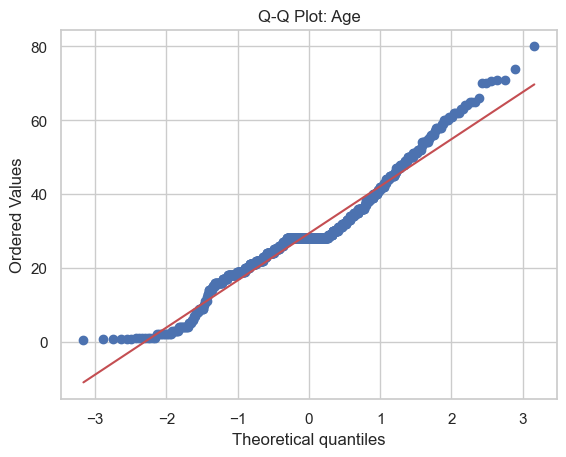

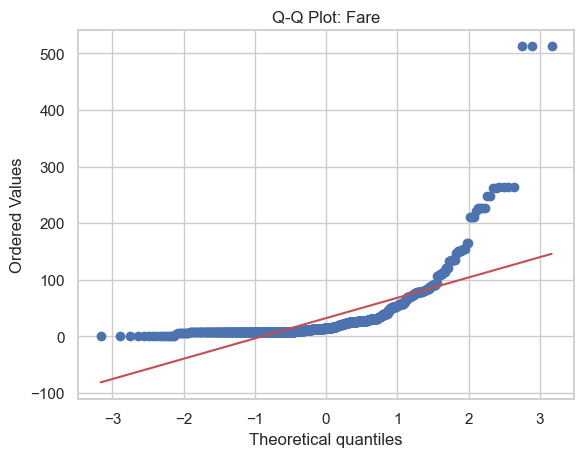

In [4]:
import scipy.stats as stats
import pylab

# Age Q-Q
stats.probplot(df['Age'], dist="norm", plot=pylab)
pylab.title('Q-Q Plot: Age')
pylab.show()

# Fare Q-Q
stats.probplot(df['Fare'], dist="norm", plot=pylab)
pylab.title('Q-Q Plot: Fare')
pylab.show()


    Age  Age_scaled
0  22.0   -0.565736
1  38.0    0.663861
2  26.0   -0.258337
3  35.0    0.433312
4  35.0    0.433312
2.272779794518839e-16 1.0005616400330457


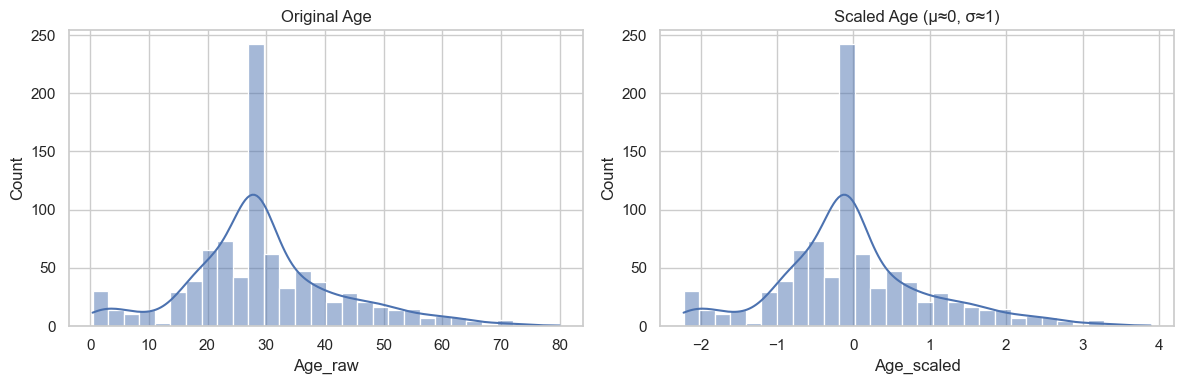

['scaler_age.pkl']

In [5]:
from sklearn.preprocessing import StandardScaler

# --- Fit & apply the scaler ---------------------------------------------
scaler_age = StandardScaler()

# a copy if i like the raw values later
df['Age_raw'] = df['Age']          

# overwrite or create a new scaled column
df['Age_scaled'] = scaler_age.fit_transform(df[['Age']])

# --- 4. Quick sanity checks -------------------------------------------------
print(df[['Age', 'Age_scaled']].head())   # peek
print(df['Age_scaled'].mean(), df['Age_scaled'].std())  # ≈ 0 and 1

# Histogram before vs after
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df['Age_raw'], kde=True, ax=ax[0])
ax[0].set_title('Original Age')
sns.histplot(df['Age_scaled'], kde=True, ax=ax[1])
ax[1].set_title('Scaled Age (μ≈0, σ≈1)')
plt.tight_layout()
plt.show()

# ---  saving the scaler for future / production ------------------
import joblib
joblib.dump(scaler_age, 'scaler_age.pkl')


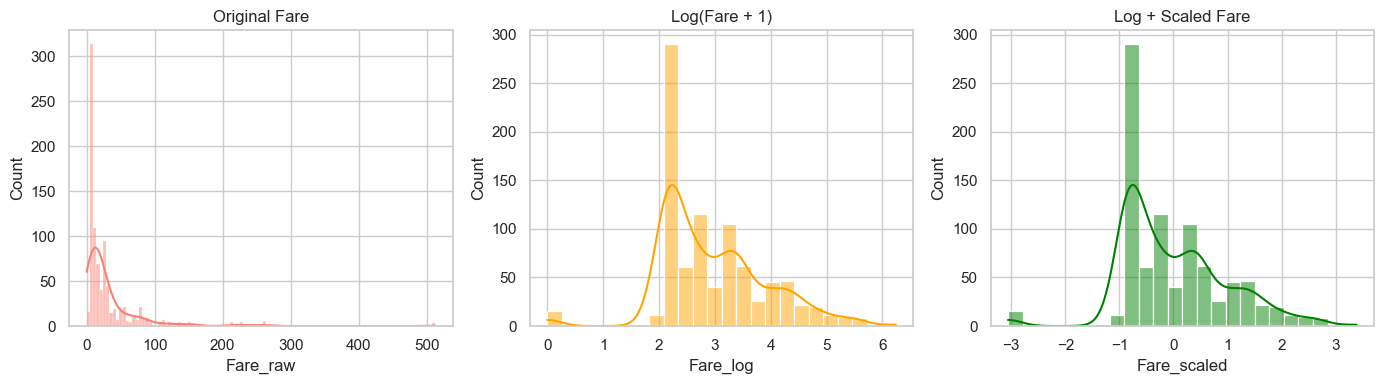

['scaler_fare.pkl']

In [6]:


# --- Log-transform Fare to reduce skew --------------------------
df['Fare_raw'] = df['Fare']  # backup original
df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + x), safe for 0 values

# ---  Applying StandardScaler ---------------------------------------
scaler_fare = StandardScaler()
df['Fare_scaled'] = scaler_fare.fit_transform(df[['Fare_log']])

# ---  Visualize ---------------------------------------------------
plt.figure(figsize=(14, 4))

# Original Fare
plt.subplot(1, 3, 1)
sns.histplot(df['Fare_raw'], kde=True, color='salmon')
plt.title('Original Fare')

# After log
plt.subplot(1, 3, 2)
sns.histplot(df['Fare_log'], kde=True, color='orange')
plt.title('Log(Fare + 1)')

# After log + scaling
plt.subplot(1, 3, 3)
sns.histplot(df['Fare_scaled'], kde=True, color='green')
plt.title('Log + Scaled Fare')

plt.tight_layout()
plt.show()

# ---  Saving scaler for test data consistency -----------------------
import joblib
joblib.dump(scaler_fare, 'scaler_fare.pkl')




## ✅ Conclusion: Numerical Features Scaled with Standardization

In this notebook, we scaled the numerical features to bring them to a common range using **Standardization (Z-score method)**:

- `Age` was approximately normally distributed and was standardized.
- `Fare` was right-skewed but was also standardized for learning consistency.

This step ensures that features are on the same scale, which helps improve the performance of many machine learning algorithms. The dataset is now ready for outlier analysis.



In [7]:
# Convert 'Sex' column: male → 0, female → 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [ ]:
# One-hot encoding for 'Embarked' (C, Q, S)
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)

# Join with original DataFrame and drop old 'Embarked'
df = pd.concat([df.drop('Embarked', axis=1), embarked_dummies], axis=1)


## ✅ Conclusion

In this notebook, we standardized and normalized the continuous numerical features to bring them to a common scale.  
We applied Standardization to `Age` (which was approximately normally distributed), and Normalization to `Fare` (which was skewed). This helps improve model performance and convergence during training.

Our dataset is now numerically scaled and ready for outlier detection and analysis.
